<a href="https://colab.research.google.com/github/wkam3/math189-project/blob/main/Math189.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [7]:
!git clone https://github.com/wkam3/math189-project.git

fatal: destination path 'math189-project' already exists and is not an empty directory.


In [44]:
df = pd.read_csv(r'/content/math189-project/games.csv')

In [45]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4




```
**Data Cleaning**  
predict winner based off opening moves

1. pick which columns are useful
2. feature engineer
3. hot one encode and make sure data types are suitable for ml

**EDA**

1. correlation matrix/paired plots
2. histograms of columns to see distributions
```



In [46]:
df.drop(columns = ['created_at','last_move_at'], inplace = True)

In [47]:
df

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64


In [49]:
features = ['white_rating','black_rating','turns','victory_status','moves','opening_eco','opening_name','opening_ply']
opening_features = ['opening_eco','opening_ply','moves']

In [34]:
df

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,...,opening_eco_E81,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,24,resign,white,10+10,belcolt,1691,jamboger,1220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20054,WSJDhbPl,True,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20055,yrAas0Kj,True,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20056,b0v4tRyF,True,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
features = df[opening_features]
features

,opening_eco,opening_ply,moves
0,D10,5,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1,B00,4,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2,C20,3,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3,D02,3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4,C41,5,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
...,...,...,...
20053,A80,2,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20054,A41,2,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20055,D00,3,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20056,B07,4,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...


In [59]:
len(features['opening_eco'].unique())
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column
column_name = 'opening_eco'

# Get the value counts for the specified column
value_counts = df[column_name].value_counts()
value_counts

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A33       1
D22       1
E44       1
B58       1
D19       1
Name: opening_eco, Length: 365, dtype: int64

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame and 'column_to_encode' is the column you want to one-hot encode
column_to_encode = 'opening_eco'

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the column to encode
encoded_columns = one_hot_encoder.fit_transform(features[[column_to_encode]])

# Create DataFrame from encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out([column_to_encode]))


features = pd.concat([features,encoded_df],axis =1)

features.drop([column_to_encode], axis = 1, inplace = True)

features

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,opening_ply,moves,opening_eco_A00,opening_eco_A01,opening_eco_A02,opening_eco_A03,opening_eco_A04,opening_eco_A05,opening_eco_A06,opening_eco_A07,...,opening_eco_E81,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98
0,5,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,2,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20054,2,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20055,3,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20056,4,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
def extract_first_10_moves(moves):
    return ' '.join(moves.split()[:10])

features['first10_moves'] = features['moves'].apply(extract_first_10_moves)
features

,opening_ply,moves,opening_eco_A00,opening_eco_A01,opening_eco_A02,opening_eco_A03,opening_eco_A04,opening_eco_A05,opening_eco_A06,opening_eco_A07,...,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98,first10_moves
0,5,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+
1,4,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5
2,3,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5
3,3,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6
4,5,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,2,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7
20054,2,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5
20055,3,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7
20056,4,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5


In [67]:
features.drop(columns =['moves'], inplace = True)
features

,opening_ply,opening_eco_A00,opening_eco_A01,opening_eco_A02,opening_eco_A03,opening_eco_A04,opening_eco_A05,opening_eco_A06,opening_eco_A07,opening_eco_A08,...,opening_eco_E87,opening_eco_E88,opening_eco_E90,opening_eco_E91,opening_eco_E92,opening_eco_E94,opening_eco_E95,opening_eco_E97,opening_eco_E98,first10_moves
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7
20054,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5
20055,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7
20056,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5


In [73]:
features = ['white_rating','black_rating','turns','victory_status','moves','opening_eco','opening_name','opening_ply']
X = df[features]
Y = df['winner']

** EDA **

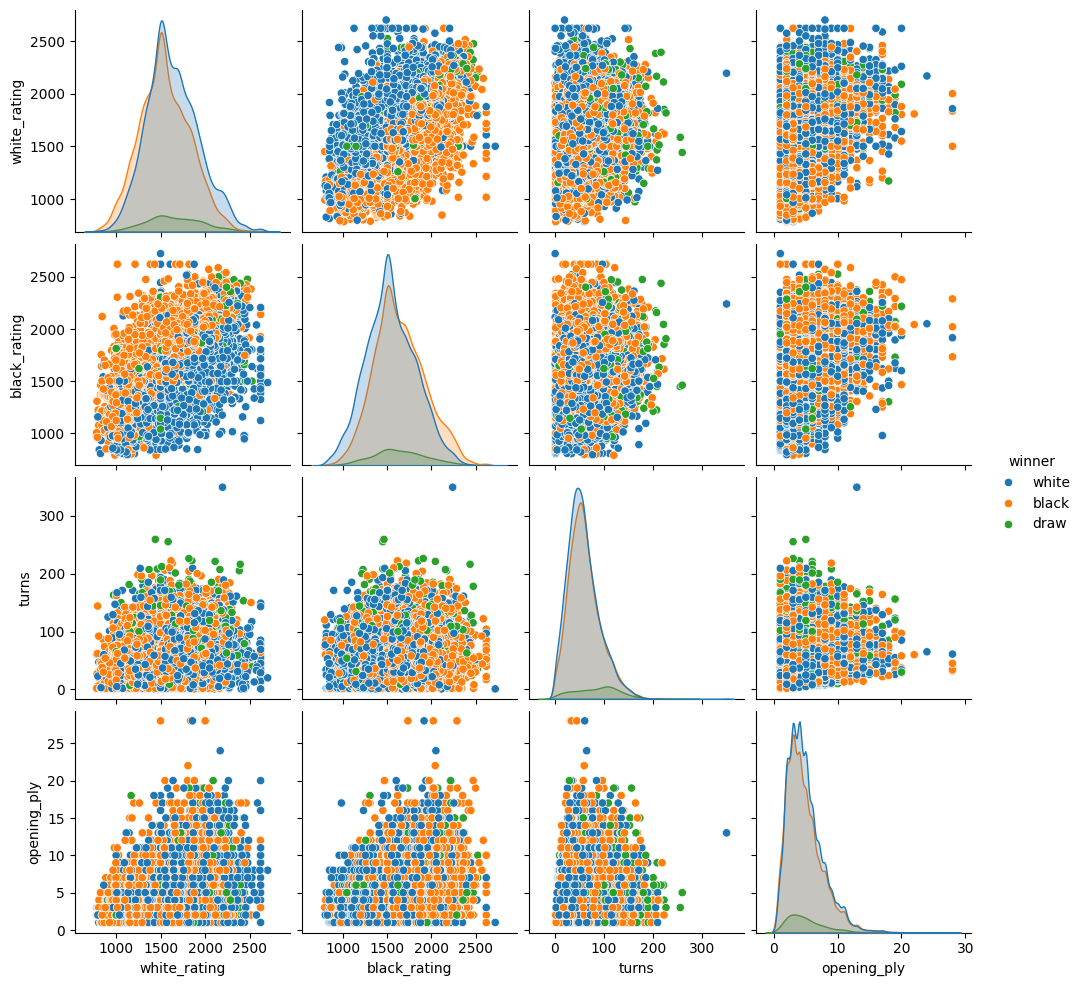

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.concat([X, Y], axis=1), hue = 'winner')

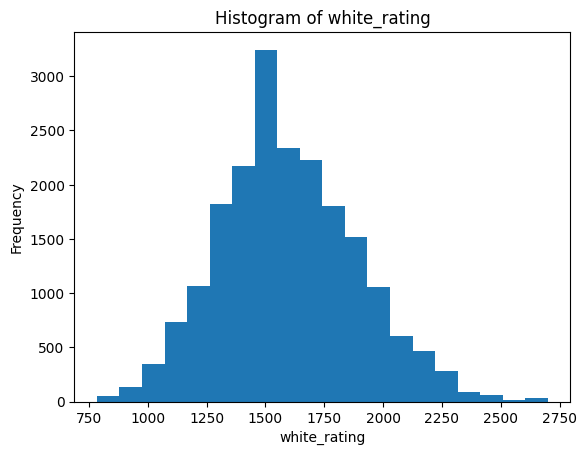

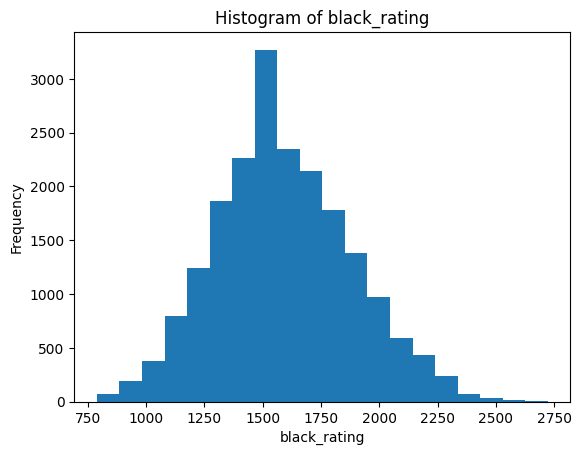

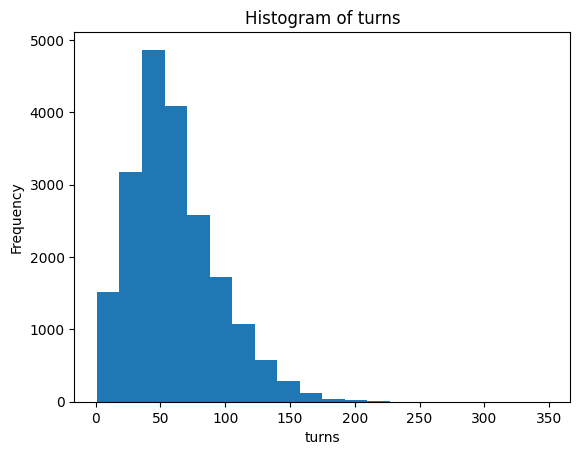

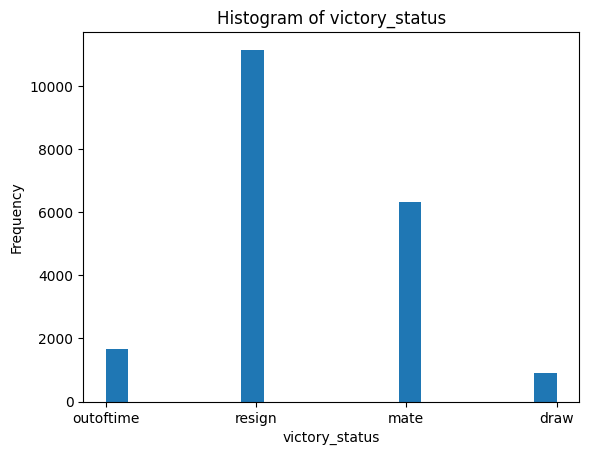

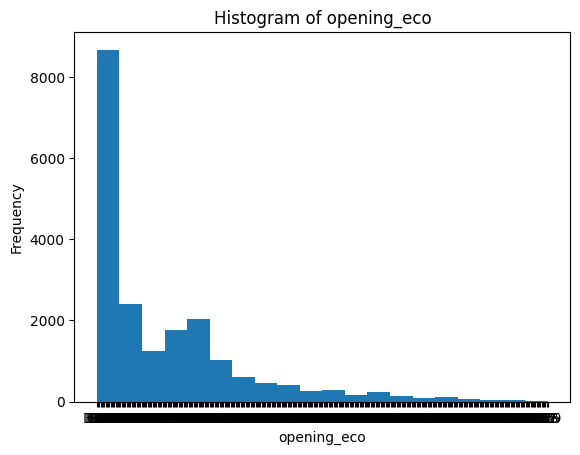

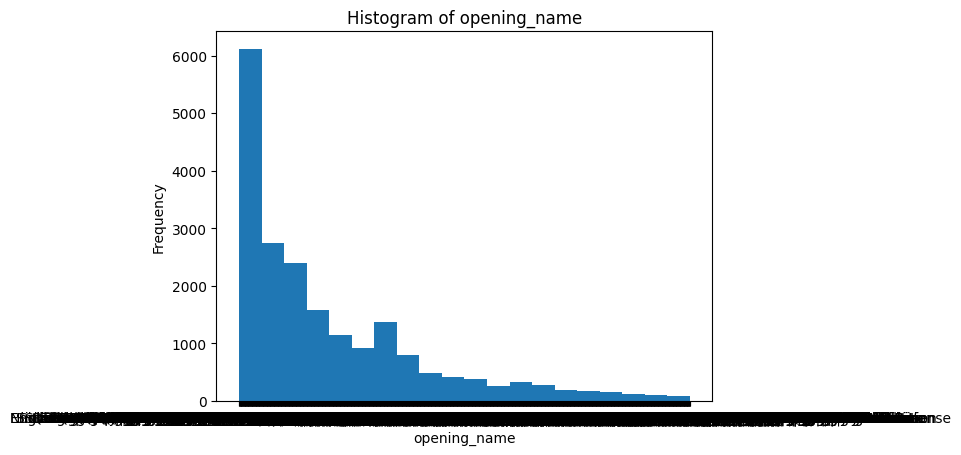

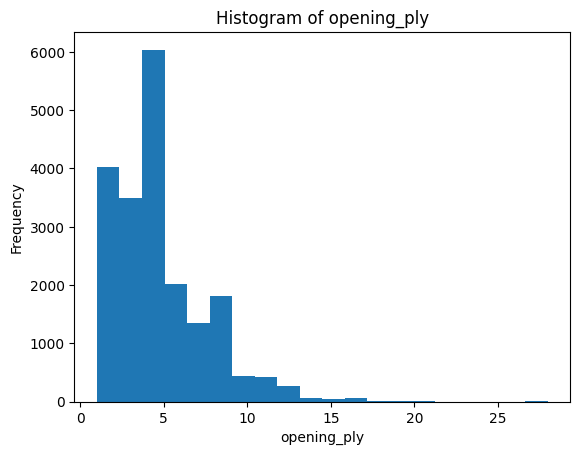

In [77]:
import matplotlib.pyplot as plt

# List of features (column names)
features = ['white_rating','black_rating','turns','victory_status','opening_eco','opening_name','opening_ply']

# Plot histograms for each feature
for feature in features:
    plt.hist(df[feature], bins=20)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
!git push